# Análise sobre dados do CEAP

Fonte: https://www12.senado.leg.br/transparencia/dados-abertos-transparencia/dados-abertos-ceaps

No momento em que esta pesquisa está sendo feita, o ano de 2022 ainda não se encerrou, portanto os gastos deste ano ainda não estão completos.

**Última atualização:** 11/08/2022

### Instalação de bibliotecas

In [ ]:
# versão do matplotlib 3.4.0 ou superior
!pip install matplotlib==3.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Tratamento e Limpeza de dados (2022)

### Primeira visualização do arquivo

In [ ]:
import pandas as pd

In [ ]:
ceaps_2022 = pd.read_csv('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2022.csv', encoding = 'latin-1', sep = ";", nrows = 3)
ceaps_2022.head()

ULTIMA ATUALIZACAO  \
ANO  MES SENADOR      TIPO_DESPESA                                       CNPJ_CPF           FORNECEDOR                    DOCUMENTO         DATA       DETALHAMENTO                                        VALOR_REEMBOLSADO   
2022 1   ACIR GURGACZ Aluguel de imóveis para escritório político, co... 004.948.028-63     GILBERTO PISELO DO NASCIMENTO 001/22            03/01/2022 Despesa com pagamento de aluguel de imóvel para...               6000   
                      Divulgação da atividade parlamentar                26.320.603/0001-64 INFORMANAHORA                 000000000000310/A 04/01/2022 Despesa com divulgação da atividade parlamentar...               1500   

                                                                                                                                                                                                          11/08/2022 02:01  
ANO  MES SENADOR      TIPO_DESPESA                                       CNPJ_CPF           FORNECEDOR                    DOCUMENTO         DATA       DETALHAMENTO                                          COD_DOCUMENTO  
2022 1   ACIR GURGACZ Aluguel de imóveis para escritório político, co... 004.948.028-63     GILBERTO PISELO DO NASCIMENTO 001/22            03/01/2022 Despesa com pagamento de aluguel de imóvel para...          2173614  
                      Divulgação da atividade parlamentar                26.320.603/0001-64 INFORMANAHORA                 000000000000310/A 04/01/2022 Despesa com divulgação da atividade parlamentar...          2173615

In [ ]:
ceaps_2022.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3 entries, ('ANO', 'MES', 'SENADOR', 'TIPO_DESPESA', 'CNPJ_CPF', 'FORNECEDOR', 'DOCUMENTO', 'DATA', 'DETALHAMENTO') to ('2022', '1', 'ACIR GURGACZ', 'Divulgação da atividade parlamentar', '26.320.603/0001-64', 'INFORMANAHORA', '000000000000310/A', '04/01/2022', 'Despesa com divulgação da atividade parlamentar no website www.informanahora.com')
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ULTIMA ATUALIZACAO  3 non-null      object
 1   11/08/2022 02:01    3 non-null      object
dtypes: object(2)
memory usage: 1.4+ KB


* O arquivo começa com a data da última atualização, isso faz com que hajam apenas duas colunas e que algumas linhas de valor igual se agrupem na tabela.

## Extração da data da última atualização

In [ ]:
# Convertendo uma string em datetime
# Referência: https://www.alura.com.br/artigos/lidando-com-datas-e-horarios-no-python?gclid=Cj0KCQjw-daUBhCIARIsALbkjSZTiCmktYTMVezV0Ubq_ONo5bJ7O6QuNcoXBGSD3yH7n0x46v89QDIaAtBbEALw_wcB

from datetime import datetime

In [ ]:
atualizacao_texto = pd.read_csv('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2022.csv', encoding = 'latin-1', sep = ";", nrows = 0)
atualizacao_texto.columns[1]

'11/08/2022 02:01'

In [ ]:
atualizacao_texto = atualizacao_texto.columns[1]
ultima_atualizacao_2022 = datetime.strptime(atualizacao_texto, '%d/%m/%Y %H:%M')
print("Última atualização do dataset (2022) " + str(ultima_atualizacao_2022))

Última atualização do dataset (2022) 2022-08-11 02:01:00


## Abertura do dataset

In [ ]:
# O header = 1 faz com que o arquivo seja lido a partir da segunda linha, ignorando a primeira e evitando o problema do multi index

ceaps_2022 = pd.read_csv('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2022.csv', encoding = "latin-1", sep = ";", header = 1, decimal = ",")
ceaps_2022.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,03/01/2022,Despesa com pagamento de aluguel de imóvel par...,6000.0,2173614
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,04/01/2022,Despesa com divulgação da atividade parlamenta...,1500.0,2173615
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,14/01/2022,Despesa com produção de texto e edição de víde...,6000.0,2173616
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,18/01/2022,Divulgação da atividade parlamentar,1000.0,2173618
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,17/01/2022,Divulgação da atividade parlamentar,2000.0,2173617


In [ ]:
ceaps_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO                9761 non-null   int64  
 1   MES                9761 non-null   int64  
 2   SENADOR            9761 non-null   object 
 3   TIPO_DESPESA       9761 non-null   object 
 4   CNPJ_CPF           9761 non-null   object 
 5   FORNECEDOR         9761 non-null   object 
 6   DOCUMENTO          9250 non-null   object 
 7   DATA               9761 non-null   object 
 8   DETALHAMENTO       5178 non-null   object 
 9   VALOR_REEMBOLSADO  9761 non-null   float64
 10  COD_DOCUMENTO      9761 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 839.0+ KB


* Os campos ANO, MES, SENADOR, TIPO_DESPESA, CNPJ_CPF, FORNECEDOR, DATA, VALOR_REEMBOLSADO, COD_DOCUMENTO estão preenchidos, mas não necessariamente possuem valores válidos.

* Os campos DOCUMENTO e DETALHAMENTO possuem células nulas. 

* Todos os nomes são de senadores reais.

# União dos dados de 2011 a 2022 e Tratamentos

* Optei por não utilizar os dados desde o início do CEAPS (2008) porque o período 2008-2010 não abrange um mandato presidencial completo.

## Abertura dos datasets

In [ ]:
def extrai_dados(caminho):
  atualizacao_texto = pd.read_csv(caminho, encoding = "latin-1", sep = ";", nrows = 0)
  atualizacao_texto = atualizacao_texto.columns[1]
  ultima_atualizacao = datetime.strptime(atualizacao_texto, '%d/%m/%Y %H:%M')

  dados = pd.read_csv(caminho, decimal = ',', encoding = 'latin-1', sep = ';', header = 1)

  return ultima_atualizacao, dados

In [ ]:
# 2022 a 2019
ultima_atualizacao_2022, ceaps_2022 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2022.csv')
ultima_atualizacao_2021, ceaps_2021 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2021.csv')
ultima_atualizacao_2020, ceaps_2020 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2020.csv')
ultima_atualizacao_2019, ceaps_2019 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2019.csv')

print("Última atualização de 2022 " + str(ultima_atualizacao_2022))
print("Última atualização de 2021 " + str(ultima_atualizacao_2021))
print("Última atualização de 2020 " + str(ultima_atualizacao_2020))
print("Última atualização de 2019 " + str(ultima_atualizacao_2019))

Última atualização de 2022 0
Última atualização de 2021 0
Última atualização de 2020 0
Última atualização de 2019 0


In [ ]:
# 2018 a 2015
ultima_atualizacao_2018, ceaps_2018 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2018.csv')
ultima_atualizacao_2017, ceaps_2017 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2017.csv')
ultima_atualizacao_2016, ceaps_2016 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2016.csv')
ultima_atualizacao_2015, ceaps_2015 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2015.csv')

print("Última atualização de 2018 " + str(ultima_atualizacao_2018))
print("Última atualização de 2017 " + str(ultima_atualizacao_2017))
print("Última atualização de 2016 " + str(ultima_atualizacao_2016))
print("Última atualização de 2015 " + str(ultima_atualizacao_2015))

Última atualização de 2018 0
Última atualização de 2017 0
Última atualização de 2016 0
Última atualização de 2015 0


In [ ]:
# 2014 a 2011
ultima_atualizacao_2014, ceaps_2014 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2014.csv')
ultima_atualizacao_2013, ceaps_2013 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2013.csv')
ultima_atualizacao_2012, ceaps_2012 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2012.csv')
ultima_atualizacao_2011, ceaps_2011 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2011.csv')

# O arquivo de 2013 possui um campo com caracteres que atrapalham a leitura e conversão dos dados
ceaps_2013['VALOR_REEMBOLSADO'] = ceaps_2013['VALOR_REEMBOLSADO'].str.replace(',', '.')
ceaps_2013['VALOR_REEMBOLSADO'] = ceaps_2013['VALOR_REEMBOLSADO'].str.replace('\n', '')
ceaps_2013['VALOR_REEMBOLSADO'] = ceaps_2013['VALOR_REEMBOLSADO'].str.replace('\r', '')
ceaps_2013['VALOR_REEMBOLSADO'] = ceaps_2013['VALOR_REEMBOLSADO'].astype('float')

print("Última atualização de 2014 " + str(ultima_atualizacao_2014))
print("Última atualização de 2013 " + str(ultima_atualizacao_2013))
print("Última atualização de 2012 " + str(ultima_atualizacao_2012))
print("Última atualização de 2011 " + str(ultima_atualizacao_2011))

Última atualização de 2014 0
Última atualização de 2013 0
Última atualização de 2012 0
Última atualização de 2011 0


In [ ]:
# 2008 a 2010
#ultima_atualizacao_2010, ceaps_2010 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2010.csv')
#ultima_atualizacao_2009, ceaps_2009 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2009.csv')
#ultima_atualizacao_2008, ceaps_2008 = extrai_dados('https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_2008.csv')

#print("Última atualização de 2010 " + str(ultima_atualizacao_2010))
#print("Última atualização de 2009 " + str(ultima_atualizacao_2009))
#print("Última atualização de 2008 " + str(ultima_atualizacao_2008))

Todas as tabelas possuem as mesmas colunas.

In [ ]:
dados = [ceaps_2022, ceaps_2021, ceaps_2020, ceaps_2019, ceaps_2018, ceaps_2017, ceaps_2016, ceaps_2015, ceaps_2014, ceaps_2013, ceaps_2012, ceaps_2011]
dados_ceaps = pd.concat(dados)
dados_ceaps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273778 entries, 0 to 25573
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ANO                273778 non-null  int64  
 1   MES                273778 non-null  int64  
 2   SENADOR            273778 non-null  object 
 3   TIPO_DESPESA       273778 non-null  object 
 4   CNPJ_CPF           273778 non-null  object 
 5   FORNECEDOR         273778 non-null  object 
 6   DOCUMENTO          255029 non-null  object 
 7   DATA               273778 non-null  object 
 8   DETALHAMENTO       176747 non-null  object 
 9   VALOR_REEMBOLSADO  273778 non-null  float64
 10  COD_DOCUMENTO      273776 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 25.1+ MB


In [ ]:
dados_ceaps.isnull().any()

ANO                  False
MES                  False
SENADOR              False
TIPO_DESPESA         False
CNPJ_CPF             False
FORNECEDOR           False
DOCUMENTO             True
DATA                 False
DETALHAMENTO          True
VALOR_REEMBOLSADO    False
COD_DOCUMENTO         True
dtype: bool

* As colunas ANO, MES, SENADOR, TIPO_DESPESA, CNPJ_CPF, FORNECEDOR, DATA e VALOR_REEMBOLSADO estão totalmente preenchidas.

* Há dois COD_DOCUMENTO faltando.

* Faltam dados nas colunas DOCUMENTO e DETALHAMENTO.

In [ ]:
dados_ceaps.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,03/01/2022,Despesa com pagamento de aluguel de imóvel par...,6000.0,2173614.0
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,04/01/2022,Despesa com divulgação da atividade parlamenta...,1500.0,2173615.0
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,14/01/2022,Despesa com produção de texto e edição de víde...,6000.0,2173616.0
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,18/01/2022,Divulgação da atividade parlamentar,1000.0,2173618.0
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,17/01/2022,Divulgação da atividade parlamentar,2000.0,2173617.0


## Tratamentos

### Correção de datas

* As datas contêm muitos problemas de preenchimento, desde campos preenchidos com texto até valores muito altos ou muito baixos.

* Para evitar transtornos, passarei a considerar apenas as colunas MES e ANO, que compõem a data em que o reembolso foi requisitado, e não parecem conter erros tão aparentes. 

In [ ]:
print(dados_ceaps['MES'].unique())
print(dados_ceaps['ANO'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011]


### Erros encontrados no preenchimento do campo DATA

#### Em duas linhas, o campo DATA foi preenchido com o que deveria estar no campo DETALHAMENTO, provavelmente um equívoco na hora de preencher o formulário.

In [ ]:
dados_ceaps['DATA'].str[6:].value_counts()

2012                                                                                                                                                         30215
2013                                                                                                                                                         29290
2017                                                                                                                                                         27111
2016                                                                                                                                                         26786
2015                                                                                                                                                         26003
2011                                                                                                                                                         25513
2018                  

In [ ]:
index_erros = dados_ceaps['DATA'].str.contains('Aérea')
index_erros
dados_ceaps[index_erros]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
5922,2015,8,EDUARDO AMORIM,"Passagens aéreas, aquáticas e terrestres nacio...",13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,"SEM FATURA"";02/08/2015""","Companhia Aérea: TAM, Localizador: YXGDSJ. Pas...","469,53",2014675.0,NaN
5929,2015,8,EDUARDO AMORIM,"Passagens aéreas, aquáticas e terrestres nacio...",13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,"¨¨SEM FATURA"";17/08/2015""","Companhia Aérea: AVIANCA, Localizador: ZNEU9F....","460,45",2016557.0,NaN


In [ ]:
dados_ceaps["DATA"] = [x.replace('Companhia Aérea: AVIANCA, Localizador: ZNEU9F. Passageiros: EDUARDO ALVES DO AMORIM (Matrícula 234312, PARLAMENTAR), Voo: 6223 - ARACAJU/BRASÍLIA - 24/08/2015;', '24/08/2015') for x in dados_ceaps["DATA"]]
dados_ceaps["DATA"] = [x.replace('Companhia Aérea: TAM, Localizador: YXGDSJ. Passageiros: JOSÉ SILVIO MONTEIRO (Matrícula 188223, COMISSIONADO), Voo: 3538 - BRASÍLIA/ARACAJU - 07/08/2015;', '07/08/2015') for x in dados_ceaps["DATA"]]

* O restante dos valores das duas linhas parecem estar preenchidos com números possivelmente reais.

* Entretando, alguns dos anos fornecidos sequer estão dentro das margens aceitas pelo datetime e podem gerar erros em uma conversão direta.

#### Datas com valores muito aquém do que poderia ser possível

In [ ]:
dados_ceaps['DATA'].str[6:].value_counts()

2012    30215
2013    29290
2017    27111
2016    26786
2015    26005
2011    25513
2018    24399
2014    22009
2019    21683
2021    16847
2020    14003
2022     9799
2010       32
2001       23
2002       12
2106        6
2007        4
0201        3
1962        2
2041        2
0215        2
1201        2
2105        2
2004        2
0202        2
2023        1
2003        1
1956        1
1965        1
5201        1
1980        1
5015        1
2915        1
0217        1
1986        1
0206        1
1977        1
0200        1
0216        1
3016        1
5017        1
2101        1
2107        1
1017        1
0208        1
1957        1
0219        1
2009        1
1901        1
Name: DATA, dtype: int64

In [ ]:
dados_ceaps['ANO_INT_TEMP'] = pd.to_numeric(dados_ceaps['DATA'].str[6:])
dados_ceaps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273778 entries, 0 to 25573
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ANO                273778 non-null  int64  
 1   MES                273778 non-null  int64  
 2   SENADOR            273778 non-null  object 
 3   TIPO_DESPESA       273778 non-null  object 
 4   CNPJ_CPF           273778 non-null  object 
 5   FORNECEDOR         273778 non-null  object 
 6   DOCUMENTO          255029 non-null  object 
 7   DATA               273778 non-null  object 
 8   DETALHAMENTO       176747 non-null  object 
 9   VALOR_REEMBOLSADO  273778 non-null  float64
 10  COD_DOCUMENTO      273776 non-null  float64
 11  ANO_INT_TEMP       273778 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 27.2+ MB


In [ ]:
index_ano_invalido_maiores = dados_ceaps['ANO_INT_TEMP'] > 2261
dados_ceaps[index_ano_invalido_maiores]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,ANO_INT_TEMP
2191,2016,10,ARMANDO MONTEIRO,"Aluguel de imóveis para escritório político, c...",41.054.867/0001-07,Jadan Office Center,1101610021,20/07/5017,"Taxa de condomínio do escritório parlamentar, ...",811.89,2050224.0,5017
12438,2016,4,JOSÉ MEDEIROS,"Locomoção, hospedagem, alimentação, combustíve...",12.262.251/0001-23,HOTEL GRAN ODARA LTDA,65509,02/04/3016,despesa com hospedagem,259.90,2034257.0,3016
10358,2015,10,JOÃO ALBERTO SOUZA,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,ADRIA VIAGENS E TURISMO LTDA,NaN,06/10/2915,"Companhia Aérea: GOL, Localizador: HF2VJM. Pas...",993.46,2029364.0,2915
12179,2015,4,JOSÉ MEDEIROS,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,ADRIA VIAGENS,NaN,24/02/5015,"Companhia Aérea: AVIANCA, Localizador: 42BZ8L....",821.25,2011103.0,5015
22966,2015,5,TELMÁRIO MOTA,"Passagens aéreas, aquáticas e terrestres nacio...",12.795.601/0001-17,GLOBAL VIAGENS EVENTOS E TURISMO,010/15,08/05/5201,"Companhia Aérea: TAM, Localizador: 5MHYZ3. Pas...",2659.35,2007486.0,5201


In [ ]:
index_ano_invalido_menores = dados_ceaps['ANO_INT_TEMP'] < 1677
display(dados_ceaps[index_ano_invalido_menores])

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,ANO_INT_TEMP
2148,2021,11,CARLOS VIANA,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,ADRIA VIAGENS E TURISMO LTDA,YK1QHD,29/10/0202,"Companhia Aérea: AZUL, Localizador: YK1QHD. Pa...",339.90,2169237.0,202
10362,2020,5,PLÍNIO VALÉRIO,Divulgação da atividade parlamentar,27.209.437/0001-96,Excelsior Comunicação Digital Ltda,2020/9,05/05/0202,NaN,1150.00,2144535.0,202
10986,2019,1,LÚCIA VÂNIA,"Aluguel de imóveis para escritório político, c...",08.573.731/0001-38,LDE Contabilidade e Administração de Condomíni...,0107007,31/01/0219,Taxa condominial,271.26,2114251.0,219
13941,2018,3,LÚCIA VÂNIA,"Aluguel de imóveis para escritório político, c...",02.266.468/0001-58,URBS Imobiliária,177528,09/05/0208,Pagamento de taxa de aluguel referente ao imóv...,1200.00,2096075.0,208
16559,2018,11,PAULO PAIM,"Locomoção, hospedagem, alimentação, combustíve...",22.484.857/0001-67,Britim Combustíveis Eirelli - EPP,108199,16/11/1201,Aquisição de combustível para veículos utiliza...,100.00,2111217.0,1201
6613,2017,12,ELMANO FÉRRER,"Aluguel de imóveis para escritório político, c...",06.277.571/0001-54,IMOBILIÁRIA SANTA CLARA LTDA.,73859,06/02/1017,DESPESA COM PAGAMENTO DE ALUGUEL DO ESCRITÓRIO...,2973.45,2083148.0,1017
15747,2017,11,LÚCIA VÂNIA,"Locomoção, hospedagem, alimentação, combustíve...",02.072.286/0006-50,Petroil Combustívels Ltda.,5021,30/11/1201,Aquisição de combustível para veículo utilizad...,100.00,2084741.0,1201
15978,2017,11,MAGNO MALTA,"Aluguel de imóveis para escritório político, c...",02.558.157/0001-62,Telefonica Brasil S.A.,05162707630,09/11/0201,Despesa com imóvel político: pagamento de tele...,421.28,2084537.0,201
18527,2017,3,PAULO ROCHA,"Passagens aéreas, aquáticas e terrestres nacio...",07.575.651/0001-59,VRG Linhas Aereas S.A.,PKIP6Q,02/03/0201,"Companhia Aérea: GOL, Localizador: PKIP6Q. Pas...",731.79,2060535.0,201
26445,2017,3,ZEZÉ PERRELLA,"Passagens aéreas, aquáticas e terrestres nacio...",33.937.681/0001-78,LATAM,3WI7U2,13/02/0217,"Companhia Aérea: LATAM, Localizador: 3WI7U2. P...",430.51,2062578.0,217


In [ ]:
dados_ceaps[index_ano_invalido_maiores]['DETALHAMENTO'].values

array(['Taxa de condomínio do escritório parlamentar, sala 1002, Recife/PE.',
       'despesa com hospedagem',
       'Companhia Aérea: GOL, Localizador: HF2VJM. Passageiros: JOÃO ALBERTO DE SOUZA (Matrícula 147907, PARLAMENTAR), Voo: 1912 - BRASILIA/ SAO LUIS - 15/10/2015;',
       'Companhia Aérea: AVIANCA, Localizador: 42BZ8L. Passageiros: JOSÉ ANTONIO DOS SANTOS MEDEIROS (Matrícula 295775, PARLAMENTAR), Voo: 6186 - CUIABÁ/BRASILIA - 26/04/2015;',
       'Companhia Aérea: TAM, Localizador: 5MHYZ3. Passageiros: TELMARIO MOTA DE OLIVEIRA (Matrícula 175459, PARLAMENTAR), Voo: 4675 - BVB-BSB - 11/05/2015;'],
      dtype=object)

In [ ]:
dados_ceaps[index_ano_invalido_menores]['DETALHAMENTO'].values

array(['Companhia Aérea: AZUL, Localizador: YK1QHD. Passageiros: CARLOS ALBERTO DIAS VIANA (Matrícula 341463, PARLAMENTAR), Voo: 4126 - CNF-BSB - 28/11/2021;',
       nan, 'Taxa condominial',
       'Pagamento de taxa de aluguel referente ao imóvel destinado ao escritório político.',
       'Aquisição de combustível para veículos utilizados na atividade parlamentar.',
       'DESPESA COM PAGAMENTO DE ALUGUEL DO ESCRITÓRIO DE APOIO DO SENADOR ELMANO FÉRRER NO PIAUÍ.',
       'Aquisição de combustível para veículo utilizado na atividade parlamentar.',
       'Despesa com imóvel político: pagamento de telefone fixo',
       'Companhia Aérea: GOL, Localizador: PKIP6Q. Passageiros: MARISA ALVES ROMAO (Matrícula 312359, COMISSIONADO), Voo: 1749 - MARABÁ/BELÉM - 06/03/2017;',
       'Companhia Aérea: LATAM, Localizador: 3WI7U2. Passageiros: VANESSA COSTA GUIMARÃES DE CARVALHO (Matrícula 252168, COMISSIONADO), Voo: 3349 - BSB/CNF - 23/03/2017; VANESSA COSTA GUIMARÃES DE CARVALHO (Matrícula 252

In [ ]:
dados_ceaps.drop(columns = ['ANO_INT_TEMP'], inplace = True)

* Nem todos os textos encontrados no Detalhamento indicam a data real do gasto, além de exigirem um tratamento específico linha a linha.

### Composição da data de requisição de reembolso

* Todas as datas estarão concentradas no primeiro dia do mês, a data de requisição do reembolso não está completa no dataset.

In [ ]:
dados_ceaps['MES'] = dados_ceaps['MES'].astype('str')
dados_ceaps['ANO'] = dados_ceaps['ANO'].astype('str')

dados_ceaps['DATA_REQUISICAO'] = dados_ceaps['MES'].str.zfill(2) + '/' + dados_ceaps['ANO']
dados_ceaps['DATA_REQUISICAO'] = pd.to_datetime(dados_ceaps['DATA_REQUISICAO'])

dados_ceaps['MES'] = dados_ceaps['MES'].astype('int')
dados_ceaps['ANO'] = dados_ceaps['ANO'].astype('int')

dados_ceaps.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,DATA_REQUISICAO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,03/01/2022,Despesa com pagamento de aluguel de imóvel par...,6000.0,2173614.0,2022-01-01
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,04/01/2022,Despesa com divulgação da atividade parlamenta...,1500.0,2173615.0,2022-01-01
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,14/01/2022,Despesa com produção de texto e edição de víde...,6000.0,2173616.0,2022-01-01
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,18/01/2022,Divulgação da atividade parlamentar,1000.0,2173618.0,2022-01-01
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,17/01/2022,Divulgação da atividade parlamentar,2000.0,2173617.0,2022-01-01


In [ ]:
dados_ceaps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273778 entries, 0 to 25573
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ANO                273778 non-null  int64         
 1   MES                273778 non-null  int64         
 2   SENADOR            273778 non-null  object        
 3   TIPO_DESPESA       273778 non-null  object        
 4   CNPJ_CPF           273778 non-null  object        
 5   FORNECEDOR         273778 non-null  object        
 6   DOCUMENTO          255029 non-null  object        
 7   DATA               273778 non-null  object        
 8   DETALHAMENTO       176747 non-null  object        
 9   VALOR_REEMBOLSADO  273778 non-null  float64       
 10  COD_DOCUMENTO      273776 non-null  float64       
 11  DATA_REQUISICAO    273778 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 27.2+ MB


### Tratamento de valores nulos

* Como o dataset já possui textos com acentuação, optei por não evitá-la.

In [ ]:
dados_ceaps['COD_DOCUMENTO'] = dados_ceaps['COD_DOCUMENTO'].fillna('Não informado')
dados_ceaps['DOCUMENTO'] = dados_ceaps['DOCUMENTO'].fillna('Não informado')
dados_ceaps['DETALHAMENTO'] = dados_ceaps['DETALHAMENTO'].fillna('Não informado')

In [ ]:
dados_ceaps.isnull().any()

ANO                  False
MES                  False
SENADOR              False
TIPO_DESPESA         False
CNPJ_CPF             False
FORNECEDOR           False
DOCUMENTO            False
DATA                 False
DETALHAMENTO         False
VALOR_REEMBOLSADO    False
COD_DOCUMENTO        False
DATA_REQUISICAO      False
dtype: bool

### Verificação de valores inconsistentes de reembolso

#### Valores negativos

In [ ]:
dados_ceaps['VALOR_REEMBOLSADO'].sort_values()

8024       -1500.00
4384        -243.40
18934         -9.00
10383          0.01
14718          0.01
            ...    
4432      216780.00
4635      256980.00
4716      270000.00
5922     2014675.00
5929     2016557.00
Name: VALOR_REEMBOLSADO, Length: 273778, dtype: float64

* Os valores serão substituídos pelos seus módulos para evitar valores nulos.

In [ ]:
dados_ceaps['VALOR_REEMBOLSADO'] = abs(dados_ceaps['VALOR_REEMBOLSADO'])

#### Valores muito baixos ( < R$ 1,00)

In [ ]:
dados_ceaps['VALOR_REEMBOLSADO'].sort_values()

18767          0.01
7391           0.01
15             0.01
12249          0.01
3295           0.01
            ...    
4432      216780.00
4635      256980.00
4716      270000.00
5922     2014675.00
5929     2016557.00
Name: VALOR_REEMBOLSADO, Length: 273778, dtype: float64

In [ ]:
dados_ceaps.query('VALOR_REEMBOLSADO < 1')

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,DATA_REQUISICAO
615,2022,1,CARLOS PORTINHO,"Passagens aéreas, aquáticas e terrestres nacio...",09.296.295/0001-60,AZUL,MGMLGZ,19/01/2022,"Companhia Aérea: AZUL, Localizador: MGMLGZ. Pa...",0.01,2173057.0,2022-01-01
1686,2022,4,DÁRIO BERGER,"Passagens aéreas, aquáticas e terrestres nacio...",33.937.681/0001-78,LATAM,TGJGQI,20/04/2022,"Companhia Aérea: LATAM, Localizador: TGJGQI. P...",0.01,2179322.0,2022-04-01
5028,2022,7,JEAN PAUL PRATES,"Locomoção, hospedagem, alimentação, combustíve...",05.756.905/0001-00,ASSU COMERCIAL DE PETROLEO EIRELLI,143432,22/07/2022,Não informado,0.03,2184690.0,2022-07-01
1451,2021,8,CARLOS PORTINHO,"Passagens aéreas, aquáticas e terrestres nacio...",33.937.681/0001-78,LATAM,INOSTW,18/08/2021,"Companhia Aérea: LATAM, Localizador: INOSTW. P...",0.90,2164842.0,2021-08-01
1485,2021,9,CARLOS PORTINHO,"Passagens aéreas, aquáticas e terrestres nacio...",09.296.295/0001-60,AZUL,YYMQTR,27/09/2021,"Companhia Aérea: AZUL, Localizador: YYMQTR. Pa...",0.01,2167020.0,2021-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...
29830,2012,10,WELLINGTON DIAS,"Locomoção, hospedagem, alimentação, combustíve...",52.378.239/0001-01,COOPERATIVA MISTA DE TRABALHO DOS MOTORISTAS A...,234C16,15/10/2012,Não informado,0.40,650779.0,2012-10-01
1397,2011,2,ANA RITA,Aquisição de material de consumo para uso no e...,34.028.316/8391-97,ECT-EMP.BRAS DE CORREIOS E TELEGRAFOS,23,01/02/2011,Não informado,0.70,389977.0,2011-02-01
9599,2011,11,JAYME CAMPOS,Divulgação da atividade parlamentar,05.366.239/0001-01,02 Internet Ltda,48111250300061,08/11/2011,Não informado,0.60,457627.0,2011-11-01
12100,2011,5,LÍDICE DA MATA,"Aluguel de imóveis para escritório político, c...",15.139.629/0001-94,COELBA,004413252,27/05/2011,Não informado,0.40,376454.0,2011-05-01


* Há muitas requisições com valores muito baixos e totalmente inconsistentes com o que foi informado no TIPO_DESPESA.

## Salvando arquivo

In [ ]:
# caminho, decimal = ',', encoding = 'latin-1', sep = ';', header = 1
dados_ceaps.to_csv('dados_ceaps_2019-2022.csv', index = False, decimal = ',', encoding = 'latin-1')

# Abrindo arquivo (iniciar daqui caso já tenha o dataset tratado)

In [128]:
# versão do matplotlib 3.4.0 ou superior
!pip install matplotlib==3.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [129]:
import pandas as pd

dados_ceaps = pd.read_csv('/content/drive/MyDrive/Projetos/7 Days Of Code/datasets/dados_ceaps_2019-2022.csv', decimal = ',', encoding = 'latin-1')
dados_ceaps['DATA_REQUISICAO'] = pd.to_datetime(dados_ceaps['DATA_REQUISICAO'])
dados_ceaps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273778 entries, 0 to 273777
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ANO                273778 non-null  int64         
 1   MES                273778 non-null  int64         
 2   SENADOR            273778 non-null  object        
 3   TIPO_DESPESA       273778 non-null  object        
 4   CNPJ_CPF           273778 non-null  object        
 5   FORNECEDOR         273778 non-null  object        
 6   DOCUMENTO          273778 non-null  object        
 7   DATA               273778 non-null  object        
 8   DETALHAMENTO       273778 non-null  object        
 9   VALOR_REEMBOLSADO  273778 non-null  float64       
 10  COD_DOCUMENTO      273778 non-null  object        
 11  DATA_REQUISICAO    273778 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 25.1+ MB


#### Padronização dos gráficos de barras horizontais e tratamento de labels extensos

In [130]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [131]:
def corta_label(label, largura_label = 50):
  label_cortada = label
  for l in range(largura_label, len(label), largura_label):
    while label_cortada[l] != " ":
      l += 1
      if l == len(label):
        break
    label_cortada = label_cortada[:l] + "\n" + label_cortada[l:]

  return label_cortada

def formata_labels(series_labels):
  list_labels = []
  for label in series_labels.values:
    list_labels.append(corta_label(label))
  return list_labels

def plota_barras_horizontais(data, x, y, formatacao = 'nenhuma', palette = "#6ca9ff", titulo = "", xlabel = "", ylabel = "", destaque = -1):
  sns.set(rc={'figure.figsize':(11, 5), 'axes.facecolor':'white', 'figure.facecolor':'white'})
  plt.figure(figsize = (12,8))

  # Cores da paleta
  if destaque != -1:
    palette = ['#cccccc' if (x < destaque) else '#6ca9ff' for x in data[x]]
  else:
    palette = ['#6ca9ff' for x in data[x]]

  # Formatação numérica dos labels
  if formatacao == 'milhoes':
    data_2 = data.copy()
    data_2[x] = (data_2[x]/1000000).round(2)
    ax = sns.barplot(data = data_2, x = x, y = y, palette = palette)
  else:
    ax = sns.barplot(data = data, x = x, y = y, palette = palette)

  # Formata labels extensos
  labels = formata_labels(data[y])
  ax.set_yticklabels(labels)

  ax.set_title(titulo, fontsize = 20, pad = 20, horizontalalignment = 'left', x = 0)
  ax.tick_params(axis = 'y', labelsize = 13)
  ax.tick_params(axis = 'x', labelsize = 13)
  plt.xlabel(xlabel, fontsize = 20)
  plt.ylabel(ylabel)

  ax.grid(False)
  sns.despine(bottom = True, left = True)
  ax.set(xticklabels = [])

  ax.bar_label(ax.containers[0])

  plt.show()

# Análises sobre tipos de despesas (2019-2022)

In [132]:
dados_ceaps = dados_ceaps.query('ANO >= 2019')

## Tipos de despesas

In [133]:
pd.DataFrame(dados_ceaps['TIPO_DESPESA'].value_counts()).rename(columns = {'TIPO_DESPESA':'OCORRÊNCIAS'})

,OCORRÊNCIAS
"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",22696
"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",13753
"Passagens aéreas, aquáticas e terrestres nacionais",13511
"Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.",4463
Divulgação da atividade parlamentar,4088
"Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar",3696
Serviços de Segurança Privada,105



## Despesas mais recorrentes

In [134]:
recorrencia_despesas = pd.DataFrame(dados_ceaps['TIPO_DESPESA'].value_counts()).reset_index()
recorrencia_despesas.rename(columns = {'index':'Tipo de despesa', 'TIPO_DESPESA':'Ocorrências'}, inplace = True)

recorrencia_despesas

,Tipo de despesa,Ocorrências
0,"Locomoção, hospedagem, alimentação, combustíve...",22696
1,"Aluguel de imóveis para escritório político, c...",13753
2,"Passagens aéreas, aquáticas e terrestres nacio...",13511
3,Aquisição de material de consumo para uso no e...,4463
4,Divulgação da atividade parlamentar,4088
5,"Contratação de consultorias, assessorias, pesq...",3696
6,Serviços de Segurança Privada,105


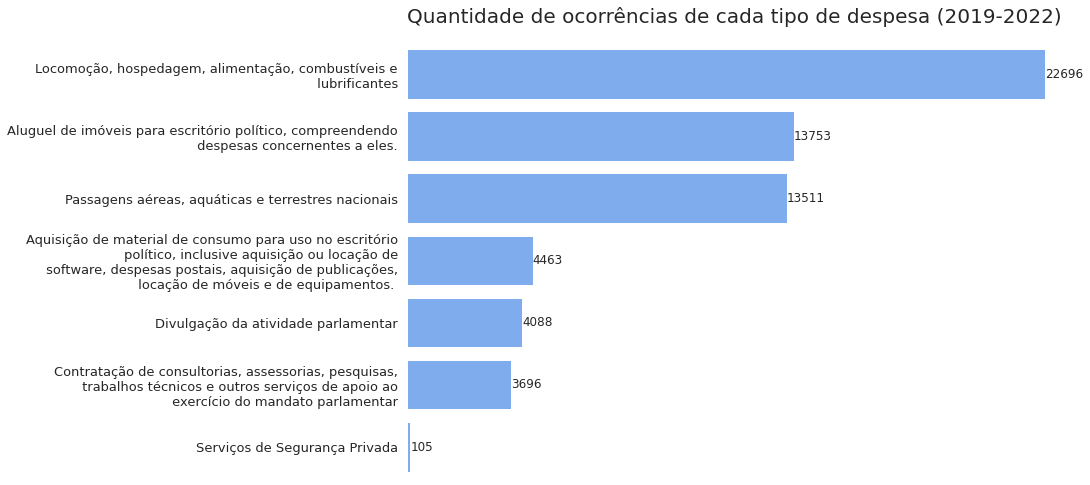

In [135]:
plota_barras_horizontais(recorrencia_despesas, x = 'Ocorrências', y = 'Tipo de despesa',
                            titulo = "Quantidade de ocorrências de cada tipo de despesa (2019-2022)")

* A primeira e a segunda despesas mais recorrentes estão relacionadas às viagens dos senadores.

## Gastos por tipo de despesa

In [136]:
total_gasto_por_despesa = dados_ceaps.groupby('TIPO_DESPESA').sum().reset_index()[["TIPO_DESPESA", "VALOR_REEMBOLSADO"]]
total_gasto_por_despesa.rename(columns = {"TIPO_DESPESA":'Tipo de despesa', "VALOR_REEMBOLSADO":'Total em reembolsos'}, inplace = True)
total_gasto_por_despesa.sort_values(by = 'Total em reembolsos', ascending = False, inplace = True)

total_gasto_por_despesa

,Tipo de despesa,Total em reembolsos
2,"Contratação de consultorias, assessorias, pesq...",21094144.20
5,"Passagens aéreas, aquáticas e terrestres nacio...",19662092.77
4,"Locomoção, hospedagem, alimentação, combustíve...",15531775.51
0,"Aluguel de imóveis para escritório político, c...",14397821.12
3,Divulgação da atividade parlamentar,11528174.32
1,Aquisição de material de consumo para uso no e...,3363897.00
6,Serviços de Segurança Privada,132898.80


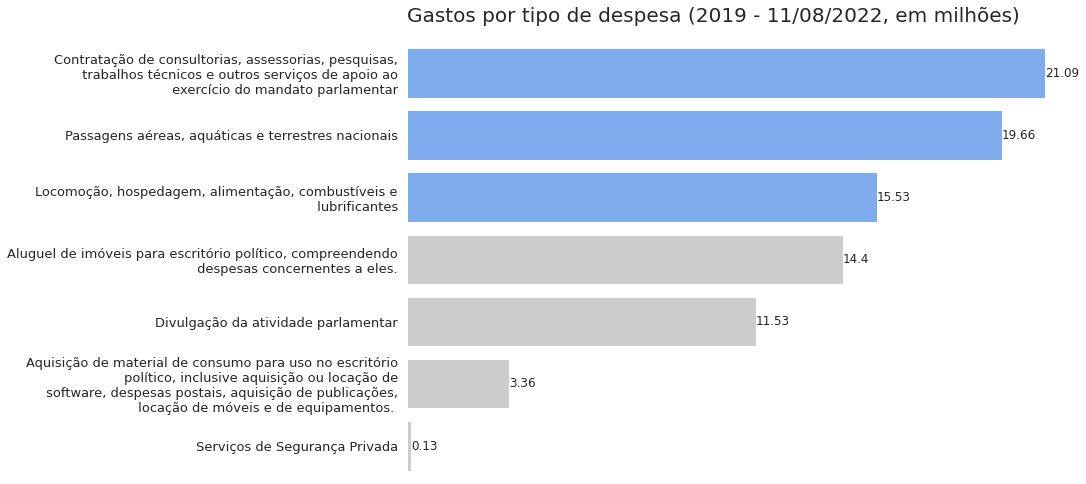

In [195]:
plota_barras_horizontais(total_gasto_por_despesa, x = 'Total em reembolsos', y = 'Tipo de despesa',
                            titulo = "Gastos por tipo de despesa (2019 - 11/08/2022, em milhões)", formatacao = 'milhoes', destaque = 15000000)

# Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar (2019 - 11/08/2022)

In [212]:
tipo_despesa = 'Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar'

### Histograma

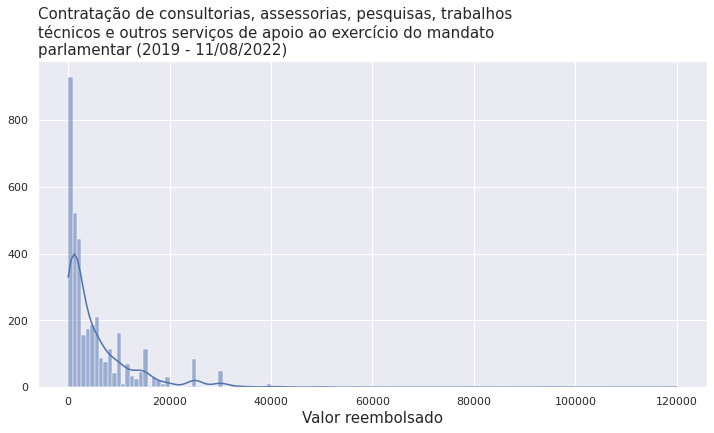

In [213]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,6))

ax = sns.histplot(dados_ceaps.query('TIPO_DESPESA == @tipo_despesa'), x = 'VALOR_REEMBOLSADO', kde = True)

ax.set_title(f'Contratação de consultorias, assessorias, pesquisas, trabalhos \ntécnicos e outros serviços de apoio ao exercício do mandato \nparlamentar (2019 - 11/08/2022)', 
             fontsize = 15, horizontalalignment = 'left', x = 0)
plt.xlabel('Valor reembolsado', fontsize = 15)
plt.ylabel('')

plt.show()

### Boxplot

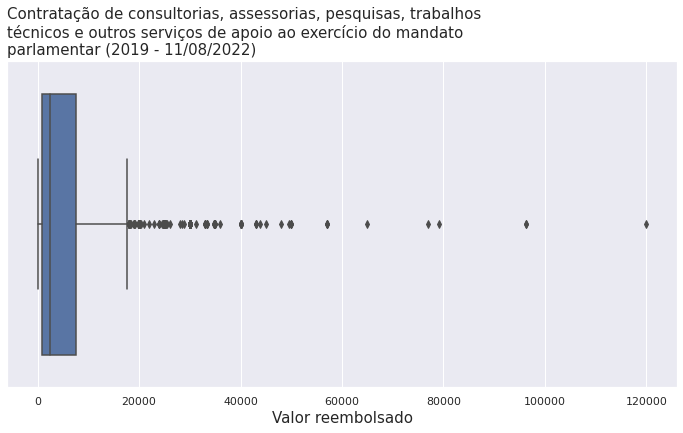

In [214]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,6))

ax = sns.boxplot(x = dados_ceaps.query('TIPO_DESPESA == @tipo_despesa')['VALOR_REEMBOLSADO'])

ax.set_title('Contratação de consultorias, assessorias, pesquisas, trabalhos \ntécnicos e outros serviços de apoio ao exercício do mandato \nparlamentar (2019 - 11/08/2022)', 
             fontsize = 15, horizontalalignment = 'left', x = 0)
plt.xlabel('Valor reembolsado', fontsize = 15)
plt.ylabel('')

plt.show()

### Estatíticas

In [215]:
dados_ceaps.query('TIPO_DESPESA == @tipo_despesa').describe()

,ANO,MES,VALOR_REEMBOLSADO
count,3696.000000,3696.000000,3696.000000
mean,2020.359578,6.386905,5707.290097
std,1.045011,3.425714,8080.010978
min,2019.000000,1.000000,3.560000
25%,2019.000000,3.000000,849.500000
50%,2020.000000,6.000000,2500.000000
75%,2021.000000,9.000000,7600.000000
max,2022.000000,12.000000,120000.000000


* Há uma grande quantidade de reembolsos de valores baixos, fazendo com que a distribuição de valores seja assimétrica.

* Por outro lado, há poucos reembolsos com valores muito acima da média.

## Tipo de despesa x Senadores

### Reembolsos individuais mais altos

In [235]:
dados_ceaps.query('TIPO_DESPESA == @tipo_despesa').sort_values('VALOR_REEMBOLSADO', ascending = False).head(10)[['SENADOR', 'FORNECEDOR', 'DETALHAMENTO', 'VALOR_REEMBOLSADO']]

,SENADOR,FORNECEDOR,DETALHAMENTO,VALOR_REEMBOLSADO
39850,WELLINGTON FAGUNDES,"T2 COMUNICAÇÃO, VIDEO E PRODUÇÕES EIRELI - EPP",Despesa com serviço de consultoria e assessori...,120000.0
38429,SÉRGIO PETECÃO,"MULT GRAF INDUSTRIA GRAFICA, EDITIRA E COMERCI...",Não informado,96250.0
38430,SÉRGIO PETECÃO,"MULT GRAF INDUSTRIA GRAFICA, EDITIRA E COMERCI...",Não informado,96250.0
58439,ROSE DE FREITAS,GRAFITUSA S/A,Não informado,79200.0
8367,SÉRGIO PETECÃO,P. H. A. RAMALHO - ME,Não informado,77012.0
24096,SÉRGIO PETECÃO,"MULT GRAF INDUSTRIA GRAFICA, EDITIRA E COMERCI...",Não informado,65000.0
58538,SÉRGIO PETECÃO,REIS GRAFICA E COMERCIO DE ETIQUETAS EIRELI ME,Não informado,57000.0
58556,SÉRGIO PETECÃO,REIS GRAFICA E COMERCIO DE ETIQUETAS EIRELI ME,Não informado,57000.0
58546,SÉRGIO PETECÃO,REIS GRAFICA E COMERCIO DE ETIQUETAS EIRELI ME,Não informado,57000.0
41352,ANGELO CORONEL,BUNKER BRAIN AUDIOVISUAL EIRELI,"Propaganda e publicidade, inclusive promoção d...",50000.0


* Dos dez reembolsos mais altos, sete pertenceram ao mesmo senador. Destes sete, nenhum teve o campo de detalhamento informado.

### Senadores que mais gastaram

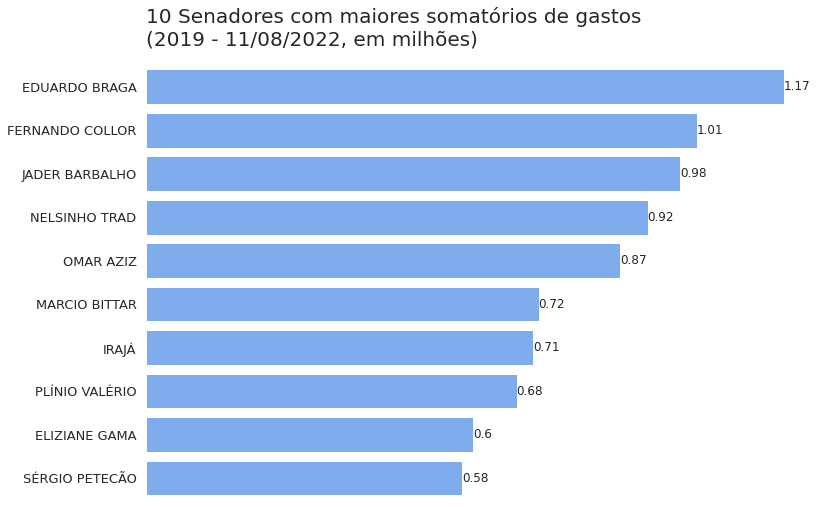

In [220]:
dados = dados_ceaps.query('TIPO_DESPESA == @tipo_despesa').groupby('SENADOR').sum().reset_index()[['SENADOR', 'VALOR_REEMBOLSADO']]
dados.sort_values('VALOR_REEMBOLSADO', ascending = False, inplace = True)

plota_barras_horizontais(dados.head(10), x = 'VALOR_REEMBOLSADO', y = 'SENADOR', formatacao = 'milhoes',
                         titulo = "10 Senadores com maiores somatórios de gastos\n(2019 - 11/08/2022, em milhões)")

* O senador mais observado na tabela anterior está em décimo dentre os senadores com maiores somatórios de gastos.

### Senadores com mais requisições de reembolso

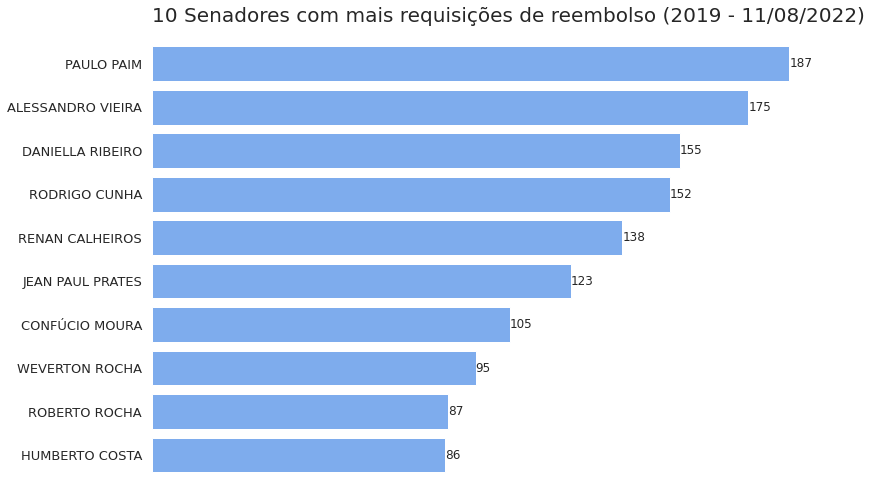

In [230]:
dados = dados_ceaps.query('TIPO_DESPESA == @tipo_despesa').groupby('SENADOR').count().reset_index()[['SENADOR', 'VALOR_REEMBOLSADO']]
dados.sort_values('VALOR_REEMBOLSADO', ascending = False, inplace = True)
dados.rename(columns = {'VALOR_REEMBOLSADO':'QUANTIDADE_REEMBOLSOS'}, inplace = True)
dados.head(10)

plota_barras_horizontais(dados.head(10), x = 'QUANTIDADE_REEMBOLSOS', y = 'SENADOR',
                         titulo = "10 Senadores com mais requisições de reembolso (2019 - 11/08/2022)")

## Passagens aéreas, aquáticas e terrestres nacionais (2019 - 2022)

In [152]:
tipo_despesa = 'Passagens aéreas, aquáticas e terrestres nacionais'

### Histograma

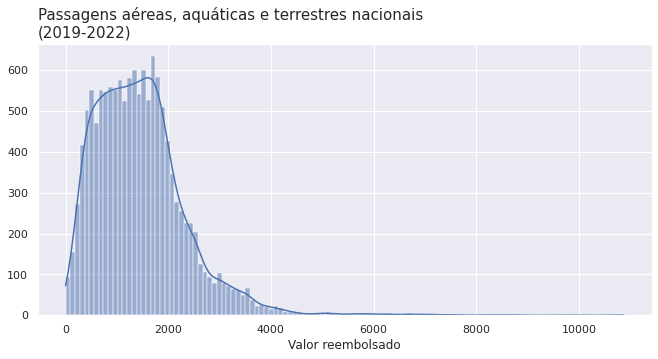

In [153]:
sns.set(rc={'figure.figsize':(11, 5)})

ax = sns.histplot(dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa'), x = 'VALOR_REEMBOLSADO', kde = True)

ax.set(xlabel = 'Valor reembolsado', ylabel = '')
ax.set_title('Passagens aéreas, aquáticas e terrestres nacionais\n(2019-2022)', 
             fontsize = 15, horizontalalignment = 'left', x = 0)

plt.show()

### Boxplot

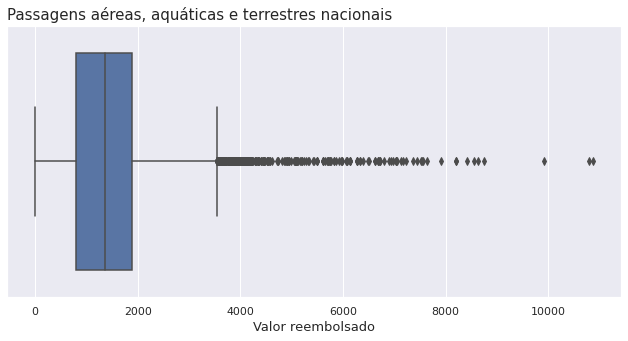

In [154]:
ax = sns.boxplot(x = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa')['VALOR_REEMBOLSADO'])

ax.set_title('Passagens aéreas, aquáticas e terrestres nacionais', 
             fontsize = 15, horizontalalignment = 'left', x = 0)
ax.set_xlabel('Valor reembolsado', fontsize = 13)

plt.show()

### Estatísticas

In [155]:
dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa').describe()

,ANO,MES,VALOR_REEMBOLSADO
count,13511.000000,13511.000000,13511.000000
mean,2020.131745,6.442750,1455.265544
std,1.126016,3.358468,911.985862
min,2019.000000,1.000000,0.010000
25%,2019.000000,3.000000,796.020000
50%,2020.000000,6.000000,1352.840000
75%,2021.000000,9.000000,1894.080000
max,2022.000000,12.000000,10871.780000


### Tipo de despesa x Senadores

#### **Senadores que mais gastaram com entradas de valores baixos (abaixo de R$ 131,02)**

---

Quartil 1% (diferente da análise anterior)

In [156]:
quantile_1 = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa')['VALOR_REEMBOLSADO'].quantile(q = 0.01)
dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa and VALOR_REEMBOLSADO <= @quantile_1').sort_values('VALOR_REEMBOLSADO').head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,DATA_REQUISICAO
29218,2020,10,DÁRIO BERGER,"Passagens aéreas, aquáticas e terrestres nacio...",33.937.681/0001-78,LATAM,RSGMOE,20/10/2020,"Companhia Aérea: LATAM, Localizador: RSGMOE. P...",0.01,2152900.0,2020-10-01
11246,2021,9,CARLOS PORTINHO,"Passagens aéreas, aquáticas e terrestres nacio...",09.296.295/0001-60,AZUL,YYMQTR,27/09/2021,"Companhia Aérea: AZUL, Localizador: YYMQTR. Pa...",0.01,2167020.0,2021-09-01
11290,2021,11,CARLOS PORTINHO,"Passagens aéreas, aquáticas e terrestres nacio...",09.296.295/0001-60,AZUL,QDNNXV,09/11/2021,"Companhia Aérea: AZUL, Localizador: QDNNXV. Pa...",0.01,2169931.0,2021-11-01
43973,2019,12,DANIELLA RIBEIRO,"Passagens aéreas, aquáticas e terrestres nacio...",07.575.651/0001-59,GOL,KLR5TJ,30/10/2019,"Companhia Aérea: GOL, Localizador: KLR5TJ. Pas...",0.01,2137509.0,2019-12-01
11300,2021,11,CARLOS PORTINHO,"Passagens aéreas, aquáticas e terrestres nacio...",09.296.295/0001-60,AZUL,YWR3JE,26/11/2021,"Companhia Aérea: AZUL, Localizador: YWR3JE. Pa...",0.01,2170502.0,2021-11-01


In [157]:
qnt_requisicoes_passagens = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa').shape[0]
qnt_requisicoes_passagens_1 = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa and VALOR_REEMBOLSADO <= @quantile_1').shape[0]
porcentagem = (qnt_requisicoes_passagens_1 * 100) / qnt_requisicoes_passagens
print(f'Há {qnt_requisicoes_passagens} requisições de reembolso por passagens entre 2019 e 2022, {qnt_requisicoes_passagens_1} destes têm valores de R$ {quantile_1:.2f} ou menos.')

Há 13511 requisições de reembolso por passagens entre 2019 e 2022, 136 destes têm valores de R$ 131.02 ou menos.


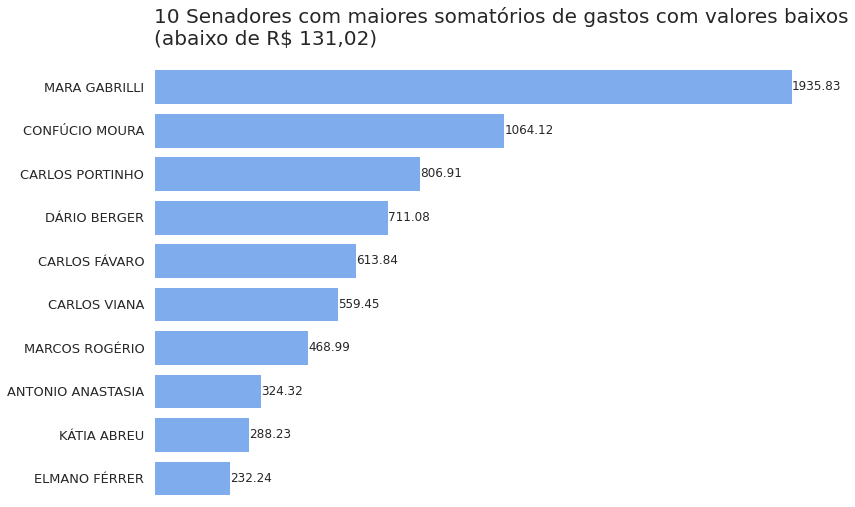

In [158]:
dados = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa and VALOR_REEMBOLSADO <= @quantile_1').groupby('SENADOR').sum().sort_values('VALOR_REEMBOLSADO', ascending = False).reset_index()[['SENADOR', 'VALOR_REEMBOLSADO']].head(10)
plota_barras_horizontais(dados, x = 'VALOR_REEMBOLSADO', y = 'SENADOR', titulo = "10 Senadores com maiores somatórios de gastos com valores baixos\n(abaixo de R$ 131,02)")

**Fornecedores constados nestas entradas**

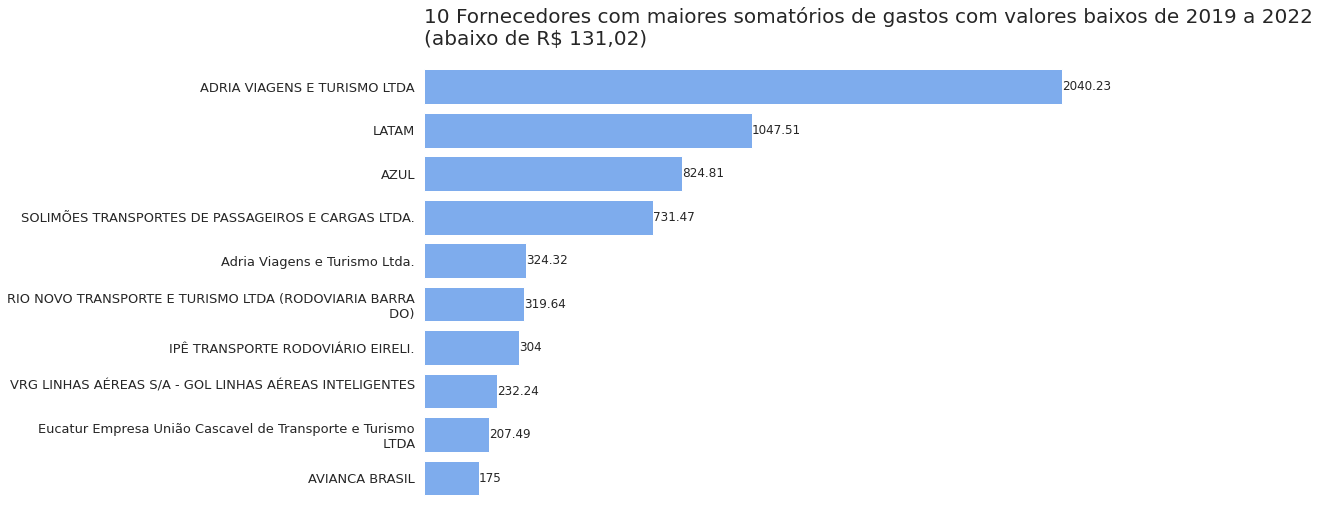

In [159]:
dados = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa and VALOR_REEMBOLSADO <= @quantile_1').groupby('FORNECEDOR').sum().sort_values('VALOR_REEMBOLSADO', ascending = False).reset_index().head(10)
plota_barras_horizontais(dados, x = 'VALOR_REEMBOLSADO', y = 'FORNECEDOR', titulo = "10 Fornecedores com maiores somatórios de gastos com valores baixos de 2019 a 2022\n(abaixo de R$ 131,02)")

#### **Senadores que mais gastaram com entradas de valores altos (acima de R$ 4.223,96)**

---

Quartil 99%

In [160]:
quantile_99 = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa')['VALOR_REEMBOLSADO'].quantile(q = 0.99)
dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa and VALOR_REEMBOLSADO >= @quantile_99').sort_values('VALOR_REEMBOLSADO', ascending = False).head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,DATA_REQUISICAO
7005,2022,4,OMAR AZIZ,"Passagens aéreas, aquáticas e terrestres nacio...",07.575.651/0001-59,GOL,RLOSVA,09/04/2022,"Companhia Aérea: GOL, Localizador: RLOSVA. Pas...",10871.78,2178512.0,2022-04-01
6075,2022,7,LUIS CARLOS HEINZE,"Passagens aéreas, aquáticas e terrestres nacio...",26.480.780/0001-08,LM TURISMO,ZDVTAP,15/07/2022,"Companhia Aérea: LATAM, Localizador: ZDVTAP. P...",10783.86,2184343.0,2022-07-01
6174,2022,5,MAILZA GOMES,"Passagens aéreas, aquáticas e terrestres nacio...",07.575.651/0001-59,GOL,QBBVME,20/04/2022,"Companhia Aérea: GOL, Localizador: QBBVME. Pas...",9924.36,2180871.0,2022-05-01
196,2022,6,ALESSANDRO VIEIRA,"Passagens aéreas, aquáticas e terrestres nacio...",39.827.859/0001-04,MM TOUR,KPLZIT,11/06/2022,"Companhia Aérea: LATAM, Localizador: KPLZIT. P...",8750.19,2184044.0,2022-06-01
3619,2022,6,FLÁVIO BOLSONARO,"Passagens aéreas, aquáticas e terrestres nacio...",02.012.862/0001-60,TAM,VBTOJC,16/06/2022,"Companhia Aérea: TAM, Localizador: VBTOJC. Pas...",8629.76,2182398.0,2022-06-01


In [161]:
qnt_requisicoes_passagens = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa').shape[0]
qnt_requisicoes_passagens_99 = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa and VALOR_REEMBOLSADO >= @quantile_99').shape[0]

print(f'Há {qnt_requisicoes_passagens} requisições de reembolso por passagens entre 2019 e 2022, {qnt_requisicoes_passagens_99} destes têm valores de R$ {quantile_99:.2f} ou mais.')

Há 13511 requisições de reembolso por passagens entre 2019 e 2022, 136 destes têm valores de R$ 4223.79 ou mais.


**Senadores que mais gastaram com entradas de valores altos (acima de R$ 4.223,96)**

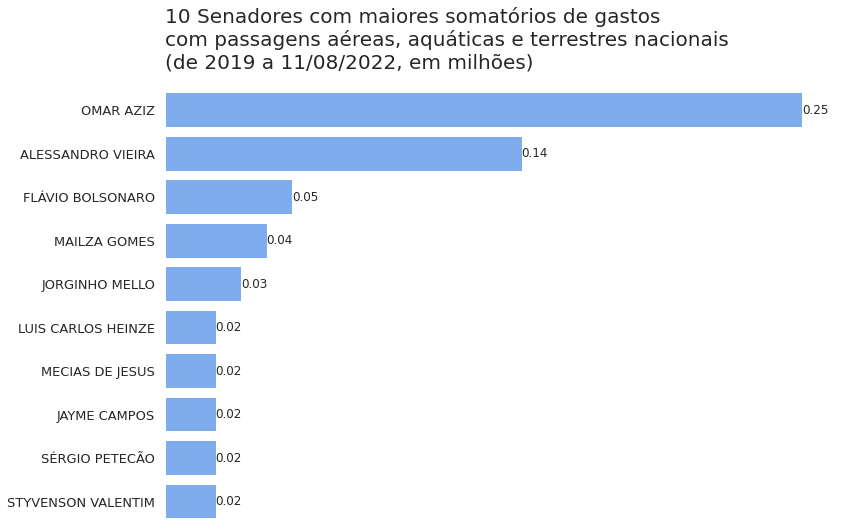

In [162]:
dados = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa and VALOR_REEMBOLSADO >= @quantile_99').groupby('SENADOR').sum().reset_index().sort_values('VALOR_REEMBOLSADO', ascending = False)[['SENADOR', 'VALOR_REEMBOLSADO']].head(10)
plota_barras_horizontais(dados, x = 'VALOR_REEMBOLSADO', y = 'SENADOR', titulo = "10 Senadores com maiores somatórios de gastos\ncom passagens aéreas, aquáticas e terrestres nacionais\n(de 2019 a 11/08/2022, em milhões)", formatacao = 'milhoes')

**Fornecedores constados nestas entradas**

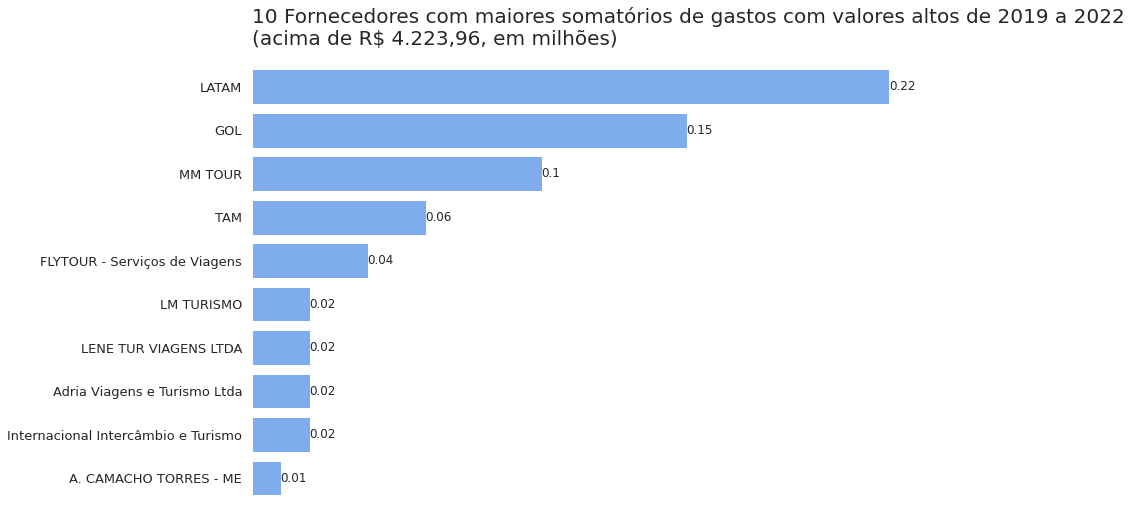

In [163]:
dados = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa and VALOR_REEMBOLSADO >= @quantile_99').groupby('FORNECEDOR').sum().sort_values('VALOR_REEMBOLSADO', ascending = False).reset_index().head(10)
plota_barras_horizontais(dados, x = 'VALOR_REEMBOLSADO', y = 'FORNECEDOR', titulo = "10 Fornecedores com maiores somatórios de gastos com valores altos de 2019 a 2022\n(acima de R$ 4.223,96, em milhões)", formatacao = 'milhoes')

### Remoção de passagens aéreas mais baratas que passagens terrestres

In [164]:
dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa and VALOR_REEMBOLSADO <= 1').shape[0]

20

In [165]:
dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa and VALOR_REEMBOLSADO <= 1')['DETALHAMENTO']

615      Companhia Aérea: AZUL, Localizador: MGMLGZ. Pa...
1686     Companhia Aérea: LATAM, Localizador: TGJGQI. P...
11212    Companhia Aérea: LATAM, Localizador: INOSTW. P...
11246    Companhia Aérea: AZUL, Localizador: YYMQTR. Pa...
11290    Companhia Aérea: AZUL, Localizador: QDNNXV. Pa...
11300    Companhia Aérea: AZUL, Localizador: YWR3JE. Pa...
11320    Companhia Aérea: AZUL, Localizador: AGKNFW. Pa...
12996    Companhia Aérea: GOL, Localizador: HACROG. Pas...
13048    Companhia Aérea: LATAM, Localizador: CLQRMX. P...
22010    Companhia Aérea: LATAM, Localizador: GCMUVW. P...
24866    Companhia Aérea: GOL, Localizador: WN6DFZ. Pas...
29122    Companhia Aérea: GOL, Localizador: SR6BNK. Pas...
29138    Companhia Aérea: LATAM, Localizador: XYEDKX. P...
29218    Companhia Aérea: LATAM, Localizador: RSGMOE. P...
35741    Companhia Aérea: LATAM, Localizador: DBUGTJ. P...
43973    Companhia Aérea: GOL, Localizador: KLR5TJ. Pas...
44295    Companhia Aérea: LATAM, Localizador: QMFMWB. P.

* As passagens com valores mais baixos poderiam ser terrestres, mas o detalhamento mostra que o gasto seria com companhia aéreas, o que não parece verídico.

In [166]:
qnt_nao_aerea = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa and not DETALHAMENTO.str.contains("Aérea")', engine = 'python').shape[0]
qnt_requisicoes_passagens = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa').shape[0]

print(f'Detalhamentos que não são de Companhia Aérea = {qnt_nao_aerea}')
print(f'Quantidade de requisições de passagens = {qnt_requisicoes_passagens}')

Detalhamentos que não são de Companhia Aérea = 78
Quantidade de requisições de passagens = 13511


In [167]:
dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa and not DETALHAMENTO.str.contains("Aérea")', engine = 'python').describe()

,ANO,MES,VALOR_REEMBOLSADO
count,78.000000,78.000000,78.000000
mean,2019.948718,6.243590,136.786410
std,1.067798,3.240113,103.523062
min,2019.000000,1.000000,10.920000
25%,2019.000000,4.000000,76.000000
50%,2020.000000,6.000000,124.905000
75%,2021.000000,9.000000,179.780000
max,2022.000000,12.000000,648.120000


* Passagens aéras com valores menores que a passagem não aérea mais barata dificilmente seriam dados reais, indicando possível equívoco na requisição do reembolso.

* Sendo assim, vou remover do dataset passagens com valores menores que R$ 10,92, para evitar possíveis distorções nas médias que poderiam atrapalhar futuras análises.

In [168]:
indices_drop = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa and DETALHAMENTO.str.contains("Aérea") and VALOR_REEMBOLSADO < 10.92', engine = 'python').index
dados_ceaps.drop(index = indices_drop, inplace = True)

Novas estatísticas

In [169]:
dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa').describe()

,ANO,MES,VALOR_REEMBOLSADO
count,13489.000000,13489.000000,13489.000000
mean,2020.131144,6.440952,1457.638410
std,1.126128,3.357010,910.832951
min,2019.000000,1.000000,10.920000
25%,2019.000000,3.000000,797.570000
50%,2020.000000,6.000000,1354.050000
75%,2021.000000,9.000000,1895.780000
max,2022.000000,12.000000,10871.780000


* O valor de remoção seria mais justo se considerasse valores reais do que seria a passagem aérea mais barata possível. Da forma que está agora, ainda podem haver valores de reembolso distrocidos.

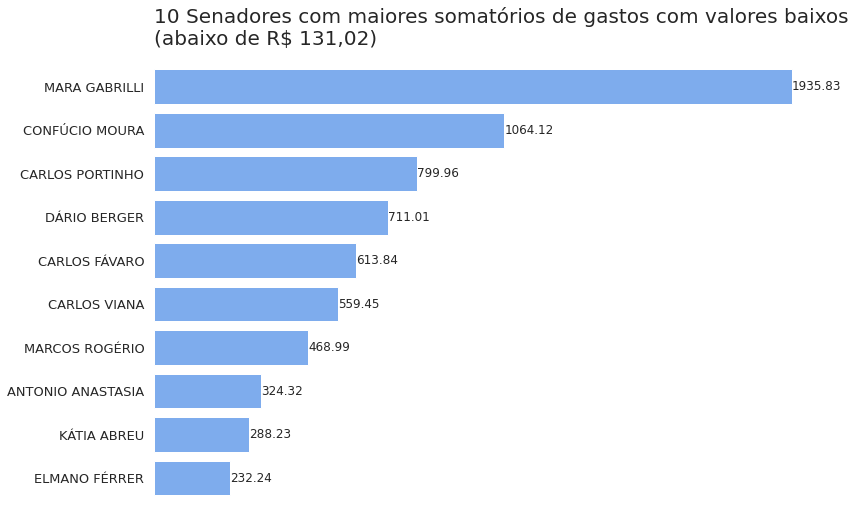

In [170]:
dados = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa and VALOR_REEMBOLSADO <= @quantile_1').groupby('SENADOR').sum().sort_values('VALOR_REEMBOLSADO', ascending = False).reset_index()[['SENADOR', 'VALOR_REEMBOLSADO']].head(10)
plota_barras_horizontais(dados, x = 'VALOR_REEMBOLSADO', y = 'SENADOR', titulo = "10 Senadores com maiores somatórios de gastos com valores baixos\n(abaixo de R$ 131,02)")

## Locomoção, hospedagem, alimentação, combustíveis e lubrificantes (2019 - 2022)

In [171]:
tipo_despesa = 'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes'

### Histograma

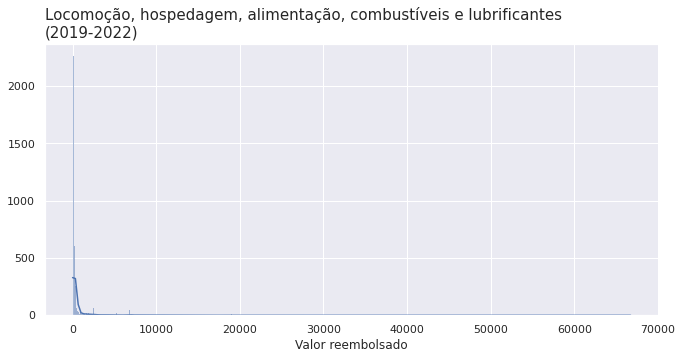

In [172]:
sns.set(rc={'figure.figsize':(11, 5)})

ax = sns.histplot(dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa'), x = 'VALOR_REEMBOLSADO', kde = True)

ax.set(xlabel = 'Valor reembolsado', ylabel = '')
ax.set_title('Locomoção, hospedagem, alimentação, combustíveis e lubrificantes\n(2019-2022)', 
             fontsize = 15, horizontalalignment = 'left', x = 0)

plt.show()

* Há muitas requisições com valores "baixos" e algumas com valores muito acima da média.

### Boxplot

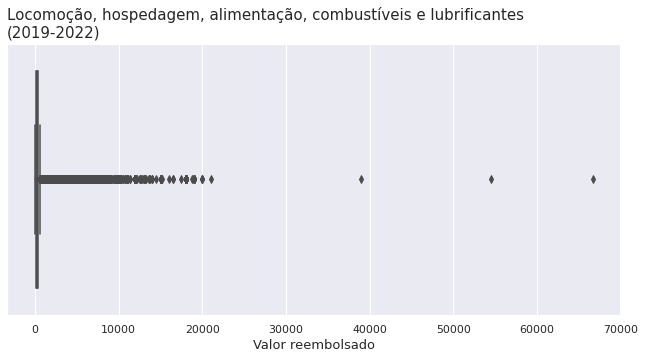

In [173]:
ax = sns.boxplot(x = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa')['VALOR_REEMBOLSADO'])

ax.set_title('Locomoção, hospedagem, alimentação, combustíveis e lubrificantes\n(2019-2022)', 
             fontsize = 15, horizontalalignment = 'left', x = 0)
ax.set_xlabel('Valor reembolsado', fontsize = 13)

plt.show()

### Estatísticas

In [174]:
dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa').describe()

,ANO,MES,VALOR_REEMBOLSADO
count,22696.000000,22696.000000,22696.000000
mean,2020.224489,6.228895,684.339774
std,1.129454,3.306572,1936.229655
min,2019.000000,1.000000,0.030000
25%,2019.000000,3.000000,100.000000
50%,2020.000000,6.000000,180.050000
75%,2021.000000,9.000000,300.097500
max,2022.000000,12.000000,66730.000000


* Novamente, há valores muito baixos (3 centavos).
* Até 75% das requisições, os valores são iguais ou abaixo de R$300,00, abaixo da média.

### Requisições com valores muito baixos

In [175]:
dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa and VALOR_REEMBOLSADO < 3.0').sort_values('VALOR_REEMBOLSADO')

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,DATA_REQUISICAO
5028,2022,7,JEAN PAUL PRATES,"Locomoção, hospedagem, alimentação, combustíve...",05.756.905/0001-00,ASSU COMERCIAL DE PETROLEO EIRELLI,143432,22/07/2022,Não informado,0.03,2184690.0,2022-07-01
28513,2020,8,CIRO NOGUEIRA,"Locomoção, hospedagem, alimentação, combustíve...",01.029.371/0001-69,Auto Posto Viracopos de Campinas Ltda,085756,04/08/2020,Combustível,0.03,2151459.0,2020-08-01
59425,2019,5,TELMÁRIO MOTA,"Locomoção, hospedagem, alimentação, combustíve...",04.979.782/0001-03,HOTEL CRISTAL LTDA-ME,S/N,25/05/2019,Não informado,0.04,2122532.0,2019-05-01
40490,2020,8,ZEQUINHA MARINHO,"Locomoção, hospedagem, alimentação, combustíve...",02.019.808/0001-46,AUTO POSTO TIMBOTEUA LTDA.,15126,28/08/2020,Não informado,0.06,2149174.0,2020-08-01
42180,2019,4,CARLOS VIANA,"Locomoção, hospedagem, alimentação, combustíve...",08.884.871/0001-27,POSTO SAGRADA FAMILIA EIRELI,000006006,29/04/2019,Veículo abastecido pelo servidor Mauro Antonio...,0.06,2121221.0,2019-04-01
39297,2020,1,VANDERLAN CARDOSO,"Locomoção, hospedagem, alimentação, combustíve...",25.124.074/0001-60,VALPOSTO COMBUSTIVEIS LTDA,Não informado,20/01/2020,Não informado,0.12,2141862.0,2020-01-01
48999,2019,1,JEAN PAUL PRATES,"Locomoção, hospedagem, alimentação, combustíve...",24.206.617/0008-00,Parelhas Gas LTDA,82083,18/01/2019,Não informado,0.17,2115340.0,2019-01-01
28515,2020,8,CIRO NOGUEIRA,"Locomoção, hospedagem, alimentação, combustíve...",27.612.990/0001-75,Camelo Buffet e Delivery EIRELI,43620,15/08/2020,Alimentação,0.30,2151511.0,2020-08-01
13329,2021,4,EDUARDO GOMES,"Locomoção, hospedagem, alimentação, combustíve...",00.692.418/0006-11,AUTO POSTO CINCO ESTRELAS LTDA.,000041549,23/04/2021,DESPESA COM COMBUSTÍVEL QUE SERVE O SENADOR ED...,0.40,2158610.0,2021-04-01


* Considerando o detalhamento e o fornecedor, dificilmente estes valores são reais.

In [176]:
index_drop = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa and VALOR_REEMBOLSADO < 3.0').index
dados_ceaps.drop(index_drop, inplace = True)

### Tipo de despesa x Senadores

#### **Senadores que mais gastaram com entradas de valores baixos (abaixo de R$ 33,00)**

---

Quartil 10% (diferente das análises anteriores)

In [177]:
quantile_10 = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa')['VALOR_REEMBOLSADO'].quantile(q = 0.10)
dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa and VALOR_REEMBOLSADO <= @quantile_10').sort_values('VALOR_REEMBOLSADO').head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,DATA_REQUISICAO
51805,2019,4,LUIS CARLOS HEINZE,"Locomoção, hospedagem, alimentação, combustíve...",20.835.471/0001-27,EXECUTIVUS CRUZ ALTA HOTEL LTDA,12753,27/04/2019,AGUA.,3.00,2121426.0,2019-04-01
40962,2019,6,ALESSANDRO VIEIRA,"Locomoção, hospedagem, alimentação, combustíve...",33.469.172/0022-92,SENAC,18587,26/06/2019,Alimentação do Parlamentar,3.27,2125558.0,2019-06-01
41086,2019,10,ALESSANDRO VIEIRA,"Locomoção, hospedagem, alimentação, combustíve...",33.469.172/0022-92,SENAC,24953,23/10/2019,Alimentação do parlamentar.,3.27,2133472.0,2019-10-01
41087,2019,10,ALESSANDRO VIEIRA,"Locomoção, hospedagem, alimentação, combustíve...",07.286.731/0001-94,SILT SELF SERVICE EIRELI ME - TAIOBA,000007873,23/10/2019,Alimentação do Parlamentar,3.28,2135429.0,2019-10-01
11825,2021,9,CARLOS VIANA,"Locomoção, hospedagem, alimentação, combustíve...",18.650.705/0001-10,SOCIEDADE HOTELEIRA NOROESTE DE MINAS LTDA,00000000031855,17/09/2021,Não informado,3.30,2167391.0,2021-09-01


In [178]:
qnt_requisicoes_locomocao = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa').shape[0]
qnt_requisicoes_locomocao_10 = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa and VALOR_REEMBOLSADO <= @quantile_10').shape[0]

print(f'Há {qnt_requisicoes_locomocao} requisições de reembolso por locomoções e relacionados entre 2019 e 2022, {qnt_requisicoes_locomocao_10} destes têm valores de R$ {quantile_10:.2f} ou menos.')

Há 22687 requisições de reembolso por locomoções e relacionados entre 2019 e 2022, 2275 destes têm valores de R$ 33.00 ou menos.


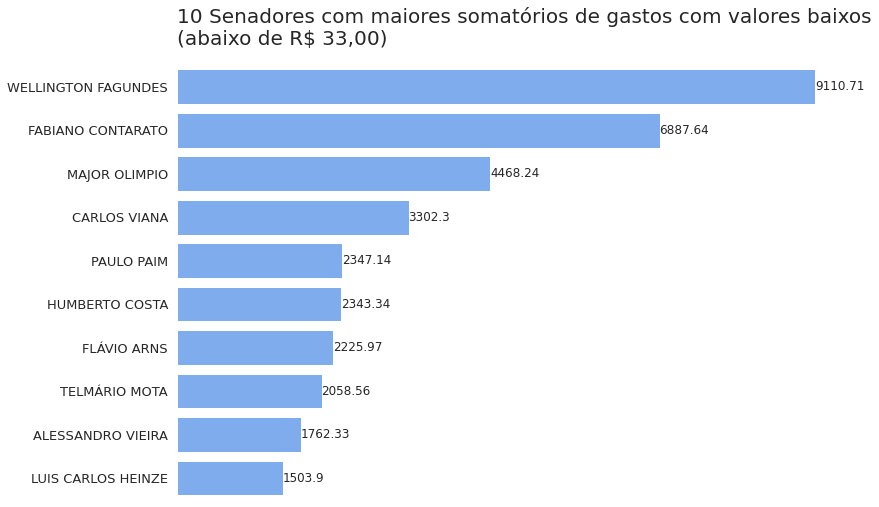

In [179]:
dados = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa and VALOR_REEMBOLSADO <= @quantile_10').groupby('SENADOR').sum().sort_values('VALOR_REEMBOLSADO', ascending = False).reset_index()[['SENADOR', 'VALOR_REEMBOLSADO']].head(10)
plota_barras_horizontais(dados, x = 'VALOR_REEMBOLSADO', y = 'SENADOR', titulo = "10 Senadores com maiores somatórios de gastos com valores baixos\n(abaixo de R$ 33,00)")

**Fornecedores constados nestas entradas**

In [180]:
dados = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa and VALOR_REEMBOLSADO <= @quantile_10').groupby('FORNECEDOR').sum().sort_values('VALOR_REEMBOLSADO', ascending = False).reset_index().head(10)

In [181]:
dados['FORNECEDOR'].unique()

array(['Sindicato dos Permissionários de Táxis e Motoristas Auxiliares do Distrito Federal - SINPETAXI',
       'UBER DO BRASIL TECNOLOGIA LTDA.', 'Uber do Brasil Tecnologia',
       'SILT SELF SERVICE EIRELI ME', 'UBER DO BRASIL TECNOLOGIA LTDA',
       'Sabores de Brasília Comércio de Alimentos Ltda',
       'SABORES DE BRASÍLIA COMÉRCIO DE ALIMENTOS LTDA',
       'Empório e Confeitaria Paris Ltda.',
       'WELL FOODS RESTAURANTES LTDA.',
       'CASARÃO DA VILA RESTAURANTE LTDA'], dtype=object)

* Alguns dos fornecedores estão repetidos.

 * diferença com letras maiúsculas e minúsculas
 * ponto do final da string

* Por enquanto, vou tratar os fornecedores "UBER DO BRASIL TECNOLOGIA LTDA" e "SABORES DE BRASÍLIA COMÉRCIO DE ALIMENTOS LTDA" 

In [182]:
dados_ceaps.query('FORNECEDOR.str.contains("UBER DO BRASIL")', engine = 'python')['FORNECEDOR'].unique()

array(['UBER DO BRASIL TECNOLOGIA LTDA',
       'UBER DO BRASIL TECNOLOGIA LTDA.',
       'UBER DO BRASILTECNOLOGIA LTDA.',
       'UBER DO BRASIL E TECNOLOGIA LTDA'], dtype=object)

In [183]:
# Convertendo todos os fornecedores para letras maiúsculas
dados_ceaps['FORNECEDOR'] = dados_ceaps['FORNECEDOR'].str.upper()

In [184]:
# Padronizando nomes do Uber
filtro = dados_ceaps['FORNECEDOR'].str.contains("UBER DO BRASIL")
dados_ceaps.loc[filtro, 'FORNECEDOR'] = 'UBER DO BRASIL TECNOLOGIA LTDA'

In [185]:
dados_ceaps.query('FORNECEDOR.str.contains("UBER DO BRASIL")', engine = 'python')['FORNECEDOR'].unique()

array(['UBER DO BRASIL TECNOLOGIA LTDA'], dtype=object)

In [186]:
dados_ceaps.query('FORNECEDOR.str.contains("SABORES DE BRAS")', engine = 'python')['FORNECEDOR'].unique()

array(['SABORES DE BRASÍLIA COMÉRCIO DE ALIMENTOS LTDA',
       'PEIXE NA REDE SABORES DE BRASILIA COMERCIO DE ALIMENTOS EIRELI',
       'SABORES DE BRASÍLIA COMÉRCIO  DE ALIMENTOS LTDA'], dtype=object)

In [187]:
# Padronizando nomes do Sabores de Brasília
filtro = dados_ceaps['FORNECEDOR'].str.contains("SABORES DE BRA")
dados_ceaps.loc[filtro, 'FORNECEDOR'] = 'SABORES DE BRASÍLIA COMÉRCIO DE ALIMENTOS LTDA'

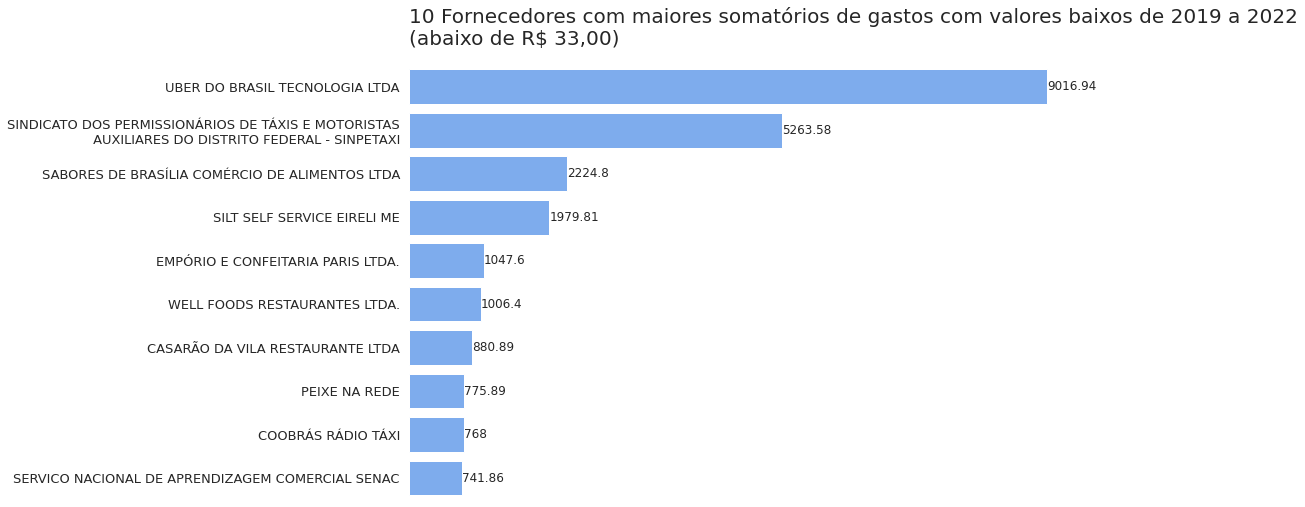

In [188]:
dados = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa and VALOR_REEMBOLSADO <= @quantile_10').groupby('FORNECEDOR').sum().sort_values('VALOR_REEMBOLSADO', ascending = False).reset_index().head(10)
plota_barras_horizontais(dados, x = 'VALOR_REEMBOLSADO', y = 'FORNECEDOR', titulo = "10 Fornecedores com maiores somatórios de gastos com valores baixos de 2019 a 2022\n(abaixo de R$ 33,00)")

#### **Senadores que mais gastaram com entradas de valores altos (acima de R$ 3.740,26)**

---

Quartil 95%

In [189]:
quantile_95 = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa')['VALOR_REEMBOLSADO'].quantile(q = 0.95)
dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa and VALOR_REEMBOLSADO >= @quantile_95').sort_values('VALOR_REEMBOLSADO', ascending = False).head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,DATA_REQUISICAO
44306,2019,3,DAVI ALCOLUMBRE,"Locomoção, hospedagem, alimentação, combustíve...",06.180.439/0001-20,AEROTOP TÁXI AÉREO LTDA - EPP,766,12/03/2019,Não informado,66730.0,2116486.0,2019-03-01
12095,2021,3,CID GOMES,"Locomoção, hospedagem, alimentação, combustíve...",52.045.457/0001-16,TAM AVIAÇÃO EXECUTIVA E TAXI AÉREO,459,30/03/2021,Não informado,54552.0,2157774.0,2021-03-01
24089,2021,11,SÉRGIO PETECÃO,"Locomoção, hospedagem, alimentação, combustíve...",05.011.693/0001-31,ORTIZ TAXI AEREO LTDA,6046,25/11/2021,Não informado,39000.0,2170533.0,2021-11-01
31968,2020,12,JAQUES WAGNER,"Locomoção, hospedagem, alimentação, combustíve...",96.704.689/0001-04,IDEALCAR LOCAÇÃO DE VEICULOS E TRANSPORTES LTDA.,00299,30/12/2020,LOCAÇÃO DE AUTOMÓVEIS.,21000.0,2155046.0,2020-12-01
59323,2019,3,TELMÁRIO MOTA,"Locomoção, hospedagem, alimentação, combustíve...",650.742.892-20,MARINES CAMPOS FEITOSA,005,26/03/2019,Não informado,20000.0,2117666.0,2019-03-01


In [190]:
qnt_requisicoes_locomocao = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa').shape[0]
qnt_requisicoes_locomocao_95 = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa and VALOR_REEMBOLSADO >= @quantile_95').shape[0]

print(f'Há {qnt_requisicoes_locomocao} requisições de reembolso por passagens entre 2019 e 2022, {qnt_requisicoes_locomocao_95} destes têm valores de R$ {quantile_95:.2f} ou mais.')

Há 22687 requisições de reembolso por passagens entre 2019 e 2022, 1135 destes têm valores de R$ 3740.26 ou mais.


**Senadores que mais gastaram com entradas de valores altos (acima de R$ 3.740,26)**

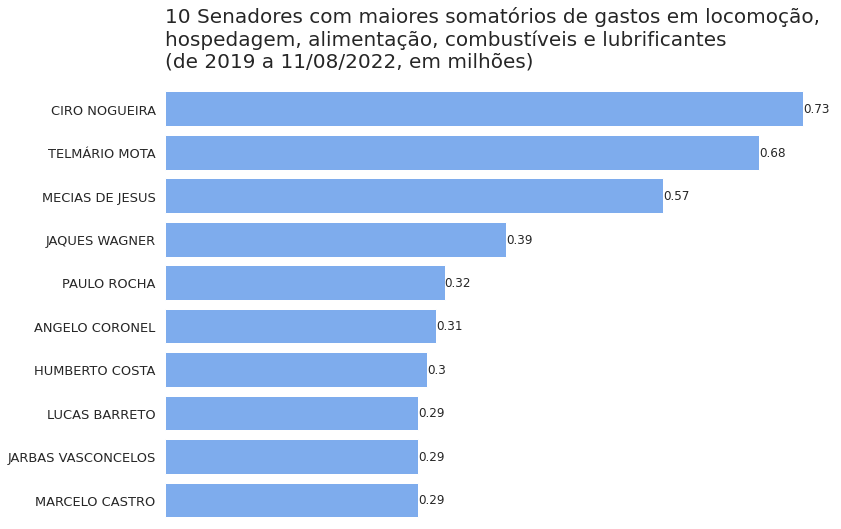

In [191]:
dados = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa and VALOR_REEMBOLSADO >= @quantile_95').groupby('SENADOR').sum().reset_index().sort_values('VALOR_REEMBOLSADO', ascending = False)[['SENADOR', 'VALOR_REEMBOLSADO']].head(10)
plota_barras_horizontais(dados, x = 'VALOR_REEMBOLSADO', y = 'SENADOR', titulo = "10 Senadores com maiores somatórios de gastos em locomoção,\nhospedagem, alimentação, combustíveis e lubrificantes\n(de 2019 a 11/08/2022, em milhões)", formatacao = 'milhoes')

**Fornecedores constados nestas entradas**

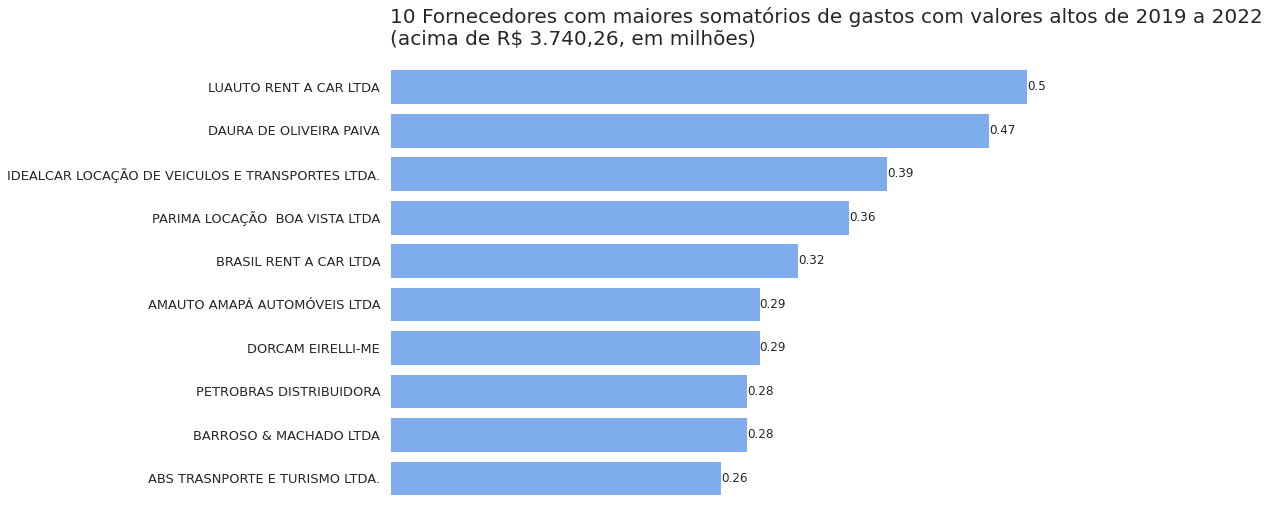

In [192]:
dados = dados_ceaps.query('ANO >= 2019 and TIPO_DESPESA == @tipo_despesa and VALOR_REEMBOLSADO >= @quantile_95').groupby('FORNECEDOR').sum().sort_values('VALOR_REEMBOLSADO', ascending = False).reset_index().head(10)
plota_barras_horizontais(dados, x = 'VALOR_REEMBOLSADO', y = 'FORNECEDOR', titulo = "10 Fornecedores com maiores somatórios de gastos com valores altos de 2019 a 2022\n(acima de R$ 3.740,26, em milhões)", formatacao = 'milhoes')